In [179]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
survey = pd.read_csv('/content/gdrive/My Drive/survey.csv - Sheet1.csv')

In [182]:
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [183]:
survey.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [184]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [185]:
survey.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [186]:
survey['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Poland                      7
Sweden                      7
Italy                       7
Belgium                     6
South Africa                6
Brazil                      6
Israel                      5
Bulgaria                    4
Singapore                   4
Mexico                      3
Russia                      3
Austria                     3
Finland                     3
Croatia                     2
Denmark                     2
Greece                      2
Colombia                    2
Portugal                    2
Moldova                     1
Czech Republic              1
Spain                       1
Latvia                      1
Slovenia  

In [187]:
null_state = survey[survey['state'].isnull()]
null_state.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
11,2014-08-27 11:32:49,29,male,Bulgaria,NaN,NaN,No,No,Never,100-500,Yes,Yes,Don't know,Not sure,No,No,Don't know,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No,NaN


In [188]:
null_state['Country'].value_counts()

United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
United States              11
India                      10
New Zealand                 8
Switzerland                 7
Italy                       7
Poland                      7
Sweden                      7
Belgium                     6
Brazil                      6
South Africa                6
Israel                      4
Singapore                   4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Bulgaria                    3
Colombia                    2
Greece                      2
Portugal                    2
Denmark                     2
Croatia                     2
Philippines                 1
Spain                       1
Bosnia and Herzegovina      1
China                       1
Hungary   

Only employees in the **United States** indicated which state they are, the rest of the country have missing values for state
therefore, we will use column **'Country'** as the only feature for location in our analysis

In [189]:
# drop the comments column(87% missing values) and state(use country instead)
survey.drop(columns=['state','comments','Timestamp'],inplace=True)

In [190]:
print(survey['self_employed'].value_counts())
print(survey['work_interfere'].value_counts())

No     1095
Yes     146
Name: self_employed, dtype: int64
Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


In [191]:
# impute missing values by mode
survey['self_employed'].fillna('No',inplace=True)
survey['work_interfere'].fillna('Sometimes',inplace=True)

In [192]:
survey.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


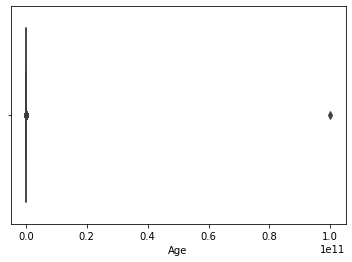

In [193]:
#age column Boxplot
sns.boxplot(survey['Age'])

From the plot above, 'Age' column has outliers

In [194]:
#removing outliers
survey.drop(survey[survey['Age'] < 0 ].index, inplace = True) 
survey.drop(survey[survey['Age'] > 100].index, inplace = True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


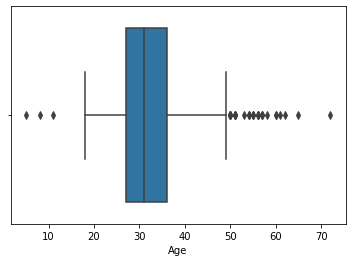

In [195]:
sns.boxplot(survey['Age'])

In [196]:
survey['treatment'].value_counts()

Yes    633
No     621
Name: treatment, dtype: int64

our Target class '**treatment**' is balanced for both category - a good thing for our model

**Data cleaning/Transformation**

In [197]:
survey['Gender'].value_counts()

Male                                              613
male                                              205
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Female                                              2
Man                                                 2
Cis Male                                            2
Female (trans)                                      2
msle                                                1
Enby                                                1
Mal                                                 1
Male-ish                    

In [198]:
# denote all male & female entry(including wrongly spelled ones) as M & F respectively

all_female = ['female', 'Cis Female', 'f', 'F', 'Woman','woman', 'Femake', 'Trans woman', 'Female', 'Female (trans)'
              , 'cis-female/femme', 'Female (cis)', 'femail', 'queer/she/they', 'Trans-female']
for i in survey.index:
    if survey.Gender[i] in all_female:
        survey.at[i, 'Gender']='F'

#fill all other unclear gender as male since it has the highest percentage of people who took the survey

    else:
        survey.at[i, 'Gender']='M'

In [199]:
survey['Gender'].value_counts()

M    1004
F     250
Name: Gender, dtype: int64

In [200]:
survey.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,F,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,M,Canada,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,M,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,M,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [201]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   Country                    1254 non-null   object
 3   self_employed              1254 non-null   object
 4   family_history             1254 non-null   object
 5   treatment                  1254 non-null   object
 6   work_interfere             1254 non-null   object
 7   no_employees               1254 non-null   object
 8   remote_work                1254 non-null   object
 9   tech_company               1254 non-null   object
 10  benefits                   1254 non-null   object
 11  care_options               1254 non-null   object
 12  wellness_program           1254 non-null   object
 13  seek_help                  1254 non-null   object
 14  anonymit

In [202]:
from sklearn.preprocessing import OrdinalEncoder

data = survey.drop(['Age'], axis=1)
encoder = OrdinalEncoder()
data_encode = encoder.fit_transform(data)

In [203]:
data_encode = pd.DataFrame(data_encode, columns=data.columns)
data_encode.head()

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.0,45.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0
1,1.0,45.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,7.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0
3,1.0,44.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0


In [204]:
data_encode['Age'] = survey['Age']

In [205]:
data_encode.head()

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age
0,0.0,45.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,37.0
1,1.0,45.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,44.0
2,1.0,7.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,32.0
3,1.0,44.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,31.0
4,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,31.0


In [206]:
data_encode.isnull().sum()

Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
Age                          5
dtype: int64

In [218]:
data_encode.dropna(inplace=True)

In [220]:
X = data_encode.drop(['treatment'],axis=1)
y = data_encode['treatment']

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

In [327]:
rfc = RandomForestClassifier(random_state=112)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=112,
                       verbose=0, warm_start=False)

In [328]:
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test,rfc_pred)

0.7866666666666666

In [329]:
# accuracy of test set
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
rfc_f1 = f1_score(y_test, rfc_pred,average='micro')
print('RFC f1_score: {}'.format(rfc_f1))

RFC f1_score: 0.7866666666666666


In [330]:
#importing LGBM classifier
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier(random_state=112)

#fit train set
LGBM.fit(X_train, y_train)

# predict test set
LGBM_pred = LGBM.predict(X_test)

# accuracy of test set
LGBM_f1 = f1_score(y_test, LGBM_pred,average='micro')
print('LGBM f1_score: {}'.format(LGBM_f1))

LGBM f1_score: 0.7493333333333333


In [331]:
#importing XGBoost classifier
from xgboost import XGBClassifier
XGB = XGBClassifier(random_state=114)

#fit train set
XGB.fit(X_train, y_train)

# predict test set
XGB_pred = XGB.predict(X_test)

# accuracy of test set
XGB_f1 = f1_score(y_test, XGB_pred, average='micro')
print('XGB f1_score: {}'.format(XGB_f1))

XGB f1_score: 0.8000000000000002


**XG Boost Classifier Model has the best accuracy score -- 0.80**

In [332]:
feature = X.columns

# features importance
feat_importance = pd.DataFrame(XGB.feature_importances_,index=feature)
feat = feat_importance.sort_values(0)
feat


,0
mental_vs_physical,0.019187
self_employed,0.020834
phys_health_consequence,0.023059
tech_company,0.023754
anonymity,0.023785
no_employees,0.023976
obs_consequence,0.025197
mental_health_interview,0.025428
Age,0.025639
seek_help,0.026046


In [333]:
#function for ploting models feature importance bar chart

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' ' + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')



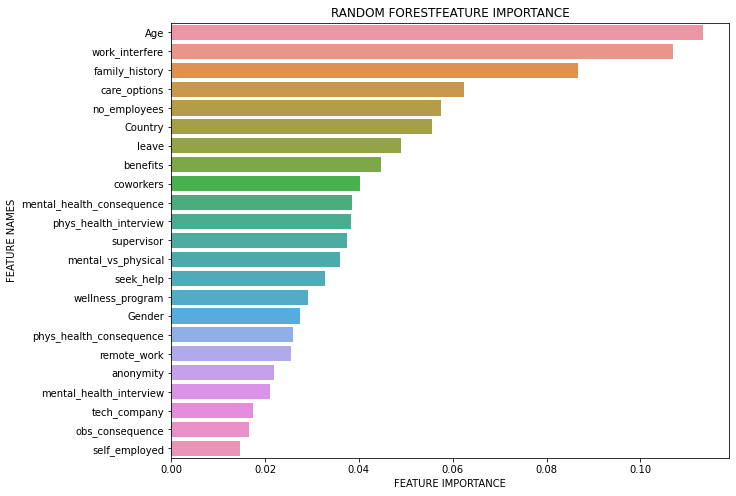

In [334]:
  plot_feature_importance(rfc.feature_importances_,X.columns,'RANDOM FOREST')

**from the plot above, the most important features that determines whether an employee has sougth for a mental health condition are:**
1. employee's **age**
2. how employee's mental health **interfere with their work**
3. and Mental **history of Family**
